**THE SPARKS FOUNDATION (#GRIPFEB21)**

*TASK 1 : Prediction using Supervised ML*

Author : Meet Gondaliya

#**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#**Importing Dataset**

In [2]:
data= "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dataset = pd.read_csv(data)
print("Data imported successfully")
print(dataset)

Data imported successfully
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
dataset.shape

(25, 2)

# **Scatter Plot**

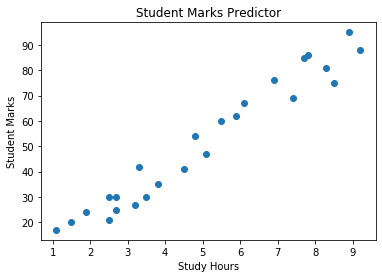

In [4]:
plt.scatter(x=dataset.Hours,y=dataset.Scores)
plt.xlabel('Study Hours')
plt.ylabel('Student Marks')
plt.title('Student Marks Predictor')
plt.show()

In [5]:
#to check any missing values
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

# **Splitting Data in Dependent and Independent Variables**

In [6]:
X=dataset.iloc[:, :-1].values #independent variable
Y=dataset.iloc[:, 1].values #dependent variable

In [7]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


#**Train-Test Splitting**

In [8]:
#train test splitting
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#**Linear Regression**

In [9]:
#select a model and train it
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

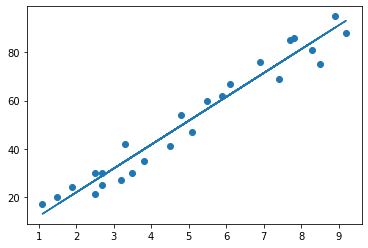

In [10]:
# Plotting the regression line #y=mx+c
line = linreg.coef_*X+linreg.intercept_
# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

#**Predictions**

In [11]:
print(X_test) # Testing data - In Hours
y_pred = linreg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})  
print(df) 

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


#**Model Evaluation**

In [13]:
#coef_ and intercept_ are coefficients and intercepts resp. for our model
print("Coefficients:\n",linreg.coef_)
print("Intercept:\n",linreg.intercept_)

Coefficients:
 [9.91065648]
Intercept:
 2.018160041434662


In [14]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [15]:
# Explained variance score: 1 is perfect prediction
from sklearn.metrics import  r2_score
print('Variance score: %.2f' % r2_score(Y_test, y_pred))

Variance score: 0.95


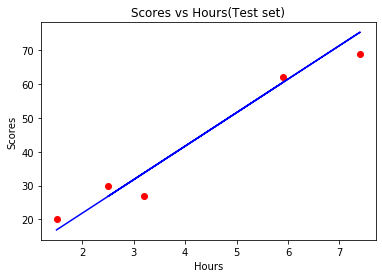

In [16]:
#Plotting the graph for test dataset
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Scores vs Hours(Test set)')
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.show()

#**Solution**

In [17]:
hours = ([[9.25]])
own_pred = linreg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


#**Conclusion**

If a student studies for 9.25 hrs/ day, according to the model, predicted score is 93.69